In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Churn_Modelling.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Churn_Modelling.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 14)


Missing Values Percentage:
 RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

Descriptive Statistics:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000   

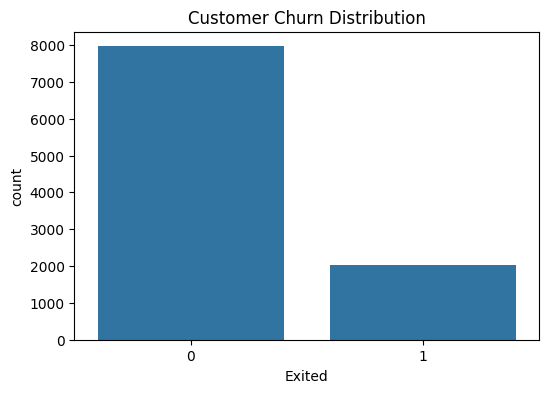

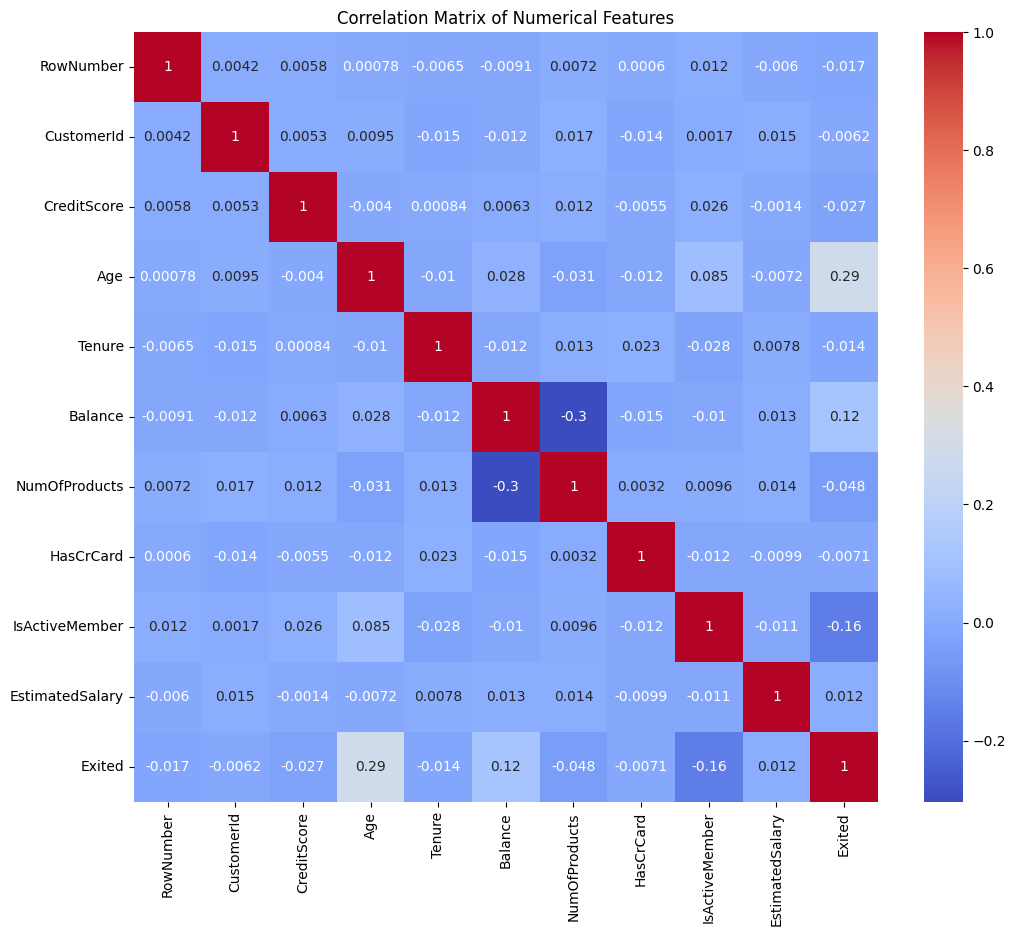

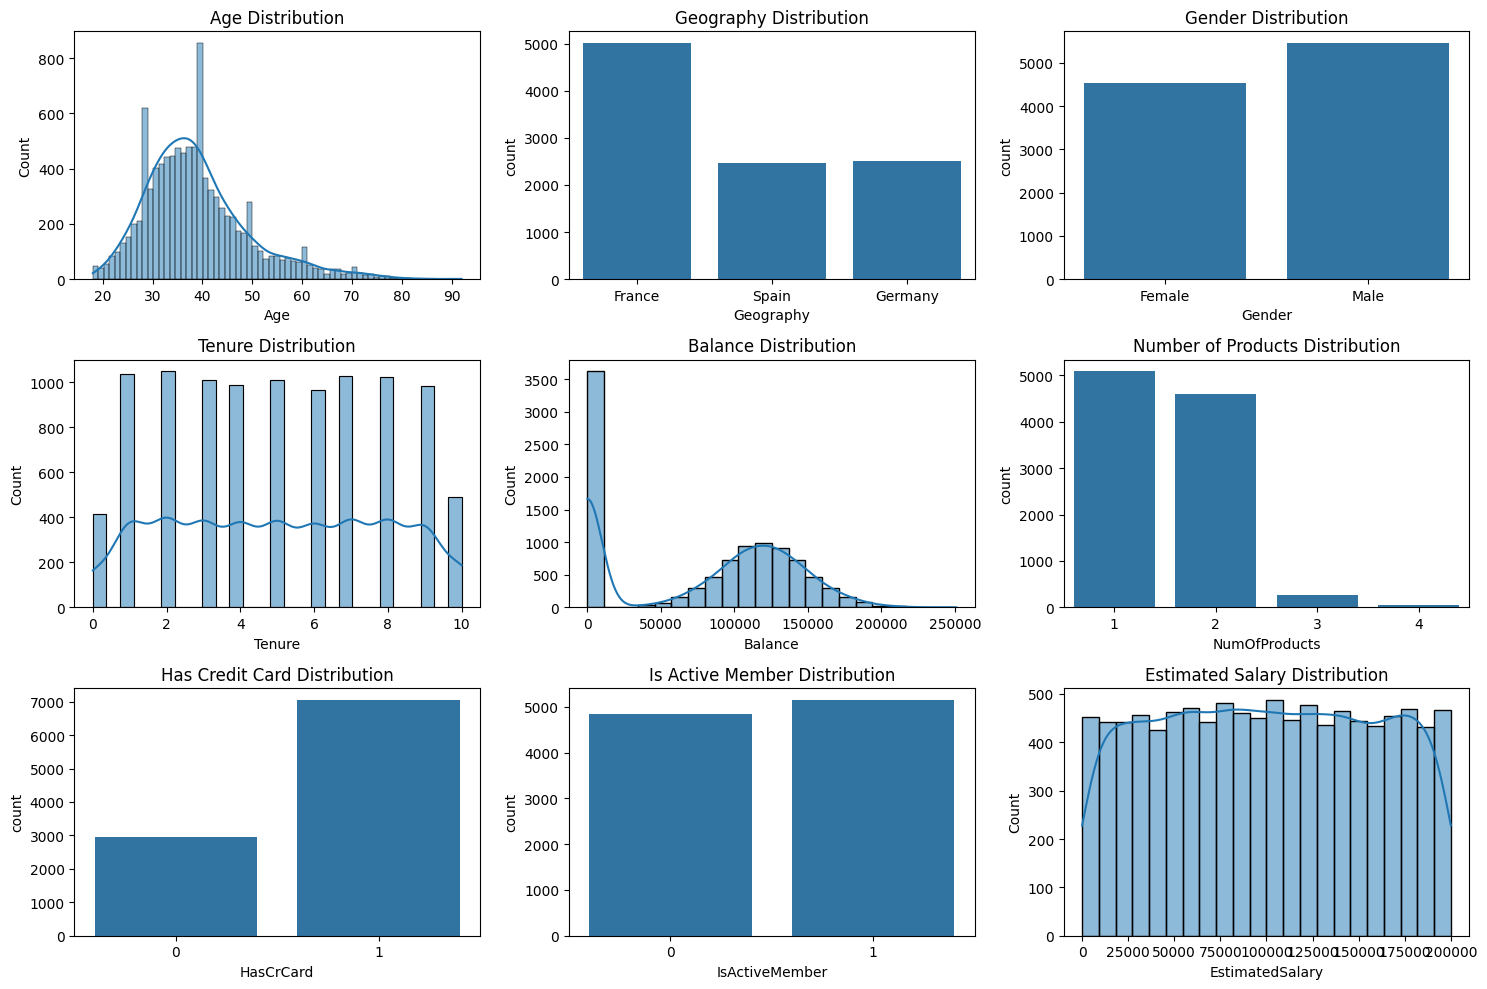

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Values
print("Missing Values Percentage:\n", df.isnull().sum() / len(df) * 100)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Target Variable Analysis
print("\nTarget Variable Distribution:")
print(df['Exited'].value_counts(normalize=True) * 100)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.show()

# Correlation Analysis
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Key Variable Exploration
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(3, 3, 2)
sns.countplot(x='Geography', data=df)
plt.title('Geography Distribution')

plt.subplot(3, 3, 3)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(3, 3, 4)
sns.histplot(df['Tenure'], kde=True)
plt.title('Tenure Distribution')

plt.subplot(3, 3, 5)
sns.histplot(df['Balance'], kde=True)
plt.title('Balance Distribution')

plt.subplot(3, 3, 6)
sns.countplot(x='NumOfProducts', data=df)
plt.title('Number of Products Distribution')

plt.subplot(3, 3, 7)
sns.countplot(x='HasCrCard', data=df)
plt.title('Has Credit Card Distribution')

plt.subplot(3, 3, 8)
sns.countplot(x='IsActiveMember', data=df)
plt.title('Is Active Member Distribution')

plt.subplot(3, 3, 9)
sns.histplot(df['EstimatedSalary'], kde=True)
plt.title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


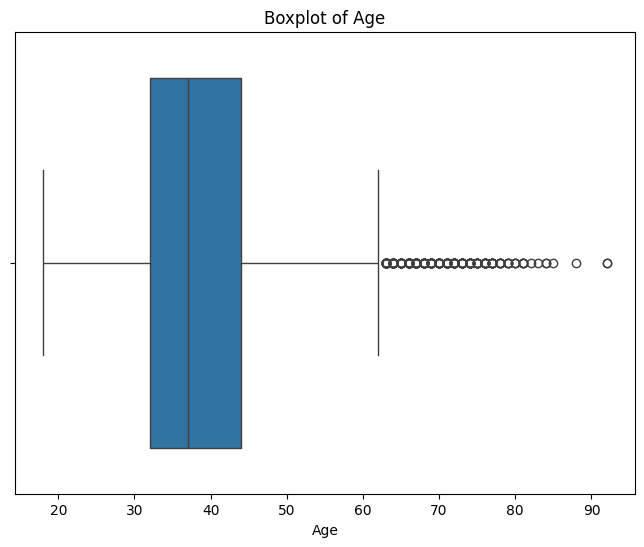

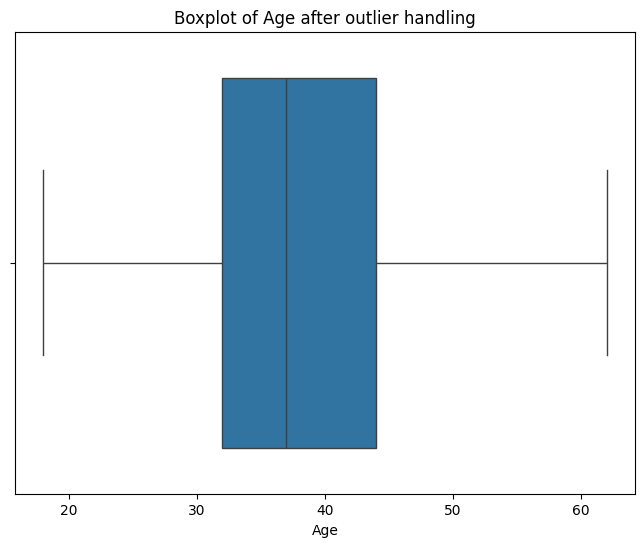

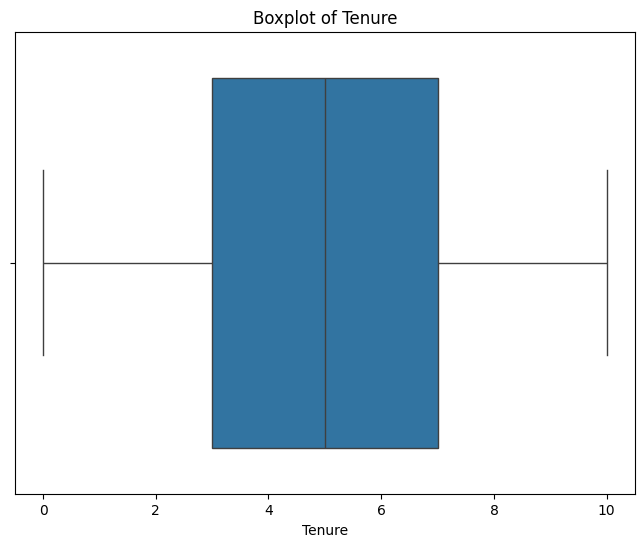

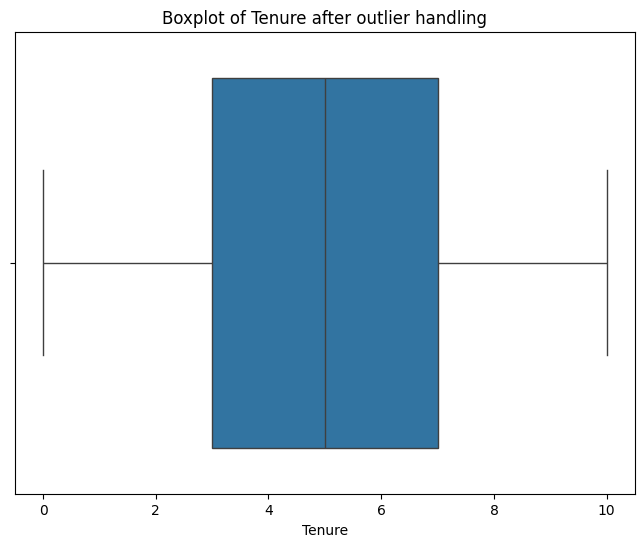

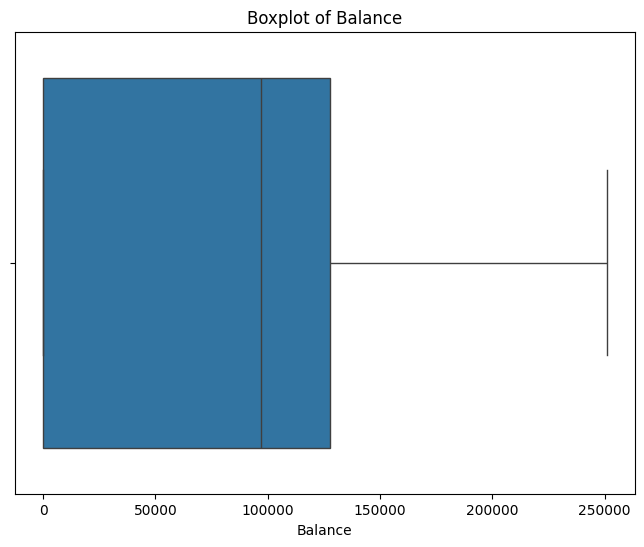

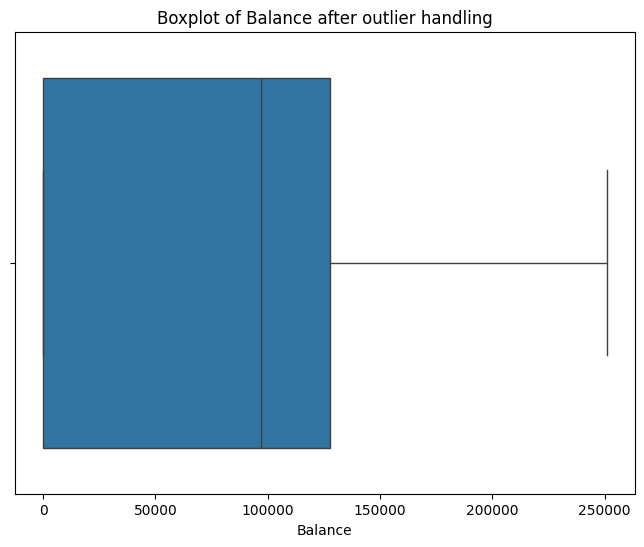

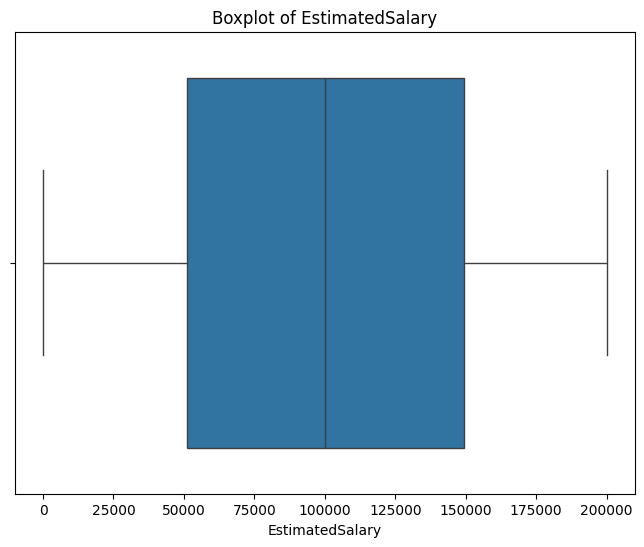

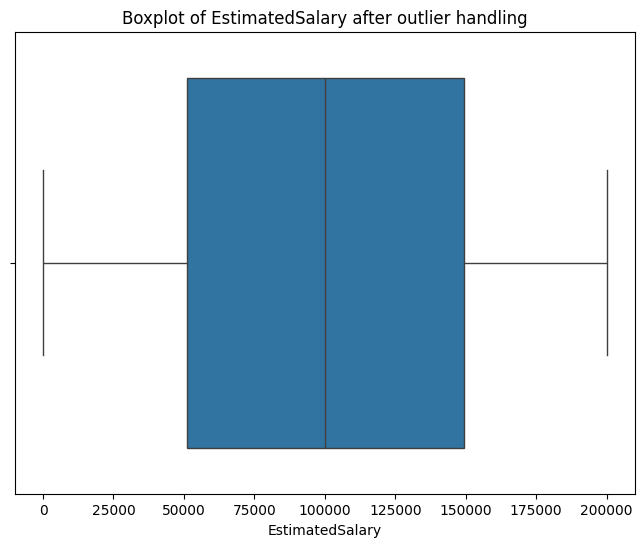

Geography
france     5014
germany    2509
spain      2477
Name: count, dtype: int64
Gender
male      5457
female    4543
Name: count, dtype: int64

Missing Values Percentage after handling outliers:
 RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


In [ ]:
print(df.dtypes)

for col in ['Age', 'Tenure', 'Balance', 'EstimatedSalary']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier handling')
    plt.show()

df['Geography'] = df['Geography'].str.lower()
df['Gender'] = df['Gender'].str.lower()

print(df['Geography'].value_counts())
print(df['Gender'].value_counts())

print("\nMissing Values Percentage after handling outliers:\n", df.isnull().sum() / len(df) * 100)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

display(X_train.head())
display(X_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_germany,Geography_spain,Gender_male
9254,0.356500,-0.678553,0.345680,-1.218471,0.808436,1,1,1.367670,False,False,True
1561,-0.203898,0.344154,-0.348369,0.696838,0.808436,1,1,1.661254,True,False,True
1670,-0.961472,-1.496718,-0.695393,0.618629,-0.916688,1,0,-0.252807,False,True,True
6087,-0.940717,-1.189906,1.386753,0.953212,-0.916688,1,0,0.915393,False,False,False
6669,-1.397337,1.775943,1.386753,1.057449,-0.916688,0,0,-1.059600,False,False,True


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_germany,Geography_spain,Gender_male
6252,-0.577496,-0.678553,-0.695393,0.329937,0.808436,0,0,-1.019605,True,False,True
4684,-0.297297,0.446424,-1.389442,-1.218471,0.808436,1,1,0.798883,False,False,True
1731,-0.525607,0.548695,-0.348369,-1.218471,0.808436,1,0,-0.727980,False,True,False
4742,-1.511492,2.082755,1.039728,0.689272,0.808436,1,1,1.221387,True,False,True
4521,-0.951094,-1.189906,0.692704,0.782839,-0.916688,1,1,0.247560,False,True,False


from matplotlib import pyplot as plt
_df_0['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Tenure'].plot(kind='hist', bins=20, title='Tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Balance'].plot(kind='hist', bins=20, title='Balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Geography_germany').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Geography_spain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Gender_male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='CreditScore', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Age', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Tenure', y='Balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Balance', y='NumOfProducts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['HasCrCard']
  ys = series['CreditScore']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('HasCrCard', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Geography_germany')):
  _plot_series(series, series_name, i)
  fig.legend(title='Geography_germany', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HasCrCard')
_ = plt.ylabel('CreditScore')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['HasCrCard']
  ys = series['CreditScore']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('HasCrCard', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Geography_spain')):
  _plot_series(series, series_name, i)
  fig.legend(title='Geography_spain', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HasCrCard')
_ = plt.ylabel('CreditScore')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['HasCrCard']
  ys = series['CreditScore']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('HasCrCard', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender_male')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender_male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HasCrCard')
_ = plt.ylabel('CreditScore')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['HasCrCard']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('HasCrCard', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Geography_germany')):
  _plot_series(series, series_name, i)
  fig.legend(title='Geography_germany', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HasCrCard')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
_df_15['CreditScore'].plot(kind='line', figsize=(8, 4), title='CreditScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Tenure'].plot(kind='line', figsize=(8, 4), title='Tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Balance'].plot(kind='line', figsize=(8, 4), title='Balance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Geography_spain'].value_counts()
    for x_label, grp in _df_19.groupby('Geography_germany')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Geography_germany')
_ = plt.ylabel('Geography_spain')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender_male'].value_counts()
    for x_label, grp in _df_20.groupby('Geography_spain')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Geography_spain')
_ = plt.ylabel('Gender_male')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Geography_germany'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='CreditScore', y='Geography_germany', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Geography_spain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='CreditScore', y='Geography_spain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Gender_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='CreditScore', y='Gender_male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Geography_germany'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Age', y='Geography_germany', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = X_temp, X_test, y_temp, y_test

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 11)
y_train shape: (8000,)
X_val shape: (1000, 11)
y_val shape: (1000,)
X_test shape: (1000, 11)
y_test shape: (1000,)


In [ ]:
X_train['IsActiveMember_x_EstimatedSalary'] = X_train['IsActiveMember'] * X_train['EstimatedSalary']
X_val['IsActiveMember_x_EstimatedSalary'] = X_val['IsActiveMember'] * X_val['EstimatedSalary']
X_test['IsActiveMember_x_EstimatedSalary'] = X_test['IsActiveMember'] * X_test['EstimatedSalary']

X_train['Age_x_NumOfProducts'] = X_train['Age'] * X_train['NumOfProducts']
X_val['Age_x_NumOfProducts'] = X_val['Age'] * X_val['NumOfProducts']
X_test['Age_x_NumOfProducts'] = X_test['Age'] * X_test['NumOfProducts']

X_train['Balance_x_NumOfProducts'] = X_train['Balance'] * X_train['NumOfProducts']
X_val['Balance_x_NumOfProducts'] = X_val['Balance'] * X_val['NumOfProducts']
X_test['Balance_x_NumOfProducts'] = X_test['Balance'] * X_test['NumOfProducts']

display(X_train.head())
display(X_val.head())
display(X_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_germany,Geography_spain,Gender_male,IsActiveMember_x_EstimatedSalary,Age_x_NumOfProducts,Balance_x_NumOfProducts
9254,0.356500,-0.678553,0.345680,-1.218471,0.808436,1,1,1.367670,False,False,True,1.367670,-0.548567,-0.985056
1561,-0.203898,0.344154,-0.348369,0.696838,0.808436,1,1,1.661254,True,False,True,1.661254,0.278226,0.563349
1670,-0.961472,-1.496718,-0.695393,0.618629,-0.916688,1,0,-0.252807,False,True,True,-0.000000,1.372023,-0.567090
6087,-0.940717,-1.189906,1.386753,0.953212,-0.916688,1,0,0.915393,False,False,False,0.000000,1.090772,-0.873798
6669,-1.397337,1.775943,1.386753,1.057449,-0.916688,0,0,-1.059600,False,False,True,-0.000000,-1.627985,-0.969350


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_germany,Geography_spain,Gender_male,IsActiveMember_x_EstimatedSalary,Age_x_NumOfProducts,Balance_x_NumOfProducts
5050,0.532921,-0.678553,-1.389442,0.793883,-0.916688,1,1,-0.768223,False,False,True,-0.768223,0.622021,-0.727743
4775,-1.303937,-0.371741,-0.001345,-1.218471,0.808436,1,1,0.090182,False,True,True,0.090182,-0.300529,-0.985056
461,-1.169027,0.037342,-0.695393,-1.218471,0.808436,1,0,-1.108211,False,False,True,-0.000000,0.030188,-0.985056
3194,0.398011,-1.292177,-0.695393,0.672393,-0.916688,1,0,-0.681096,False,False,False,-0.000000,1.184523,-0.616375
7420,1.051808,-0.064929,1.386753,1.211465,-0.916688,1,1,1.397866,True,False,False,1.397866,0.059520,-1.110535


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_germany,Geography_spain,Gender_male,IsActiveMember_x_EstimatedSalary,Age_x_NumOfProducts,Balance_x_NumOfProducts
4343,-1.065249,1.571401,-0.001345,0.268587,-0.916688,1,0,-1.700619,True,False,True,-0.000000,-1.440484,-0.246211
1794,1.778249,-0.064929,-1.389442,-1.218471,0.808436,1,0,0.976651,False,False,True,0.000000,-0.052491,-0.985056
708,-0.743540,-0.371741,1.039728,-1.218471,0.808436,0,1,-1.566091,False,False,False,-1.566091,-0.300529,-0.985056
3383,0.481032,0.037342,1.386753,0.914052,0.808436,0,1,-0.819639,True,False,True,-0.819639,0.030188,0.738953
4534,0.045168,0.241883,-1.042418,-1.218471,0.808436,1,0,1.017859,False,False,True,0.000000,0.195547,-0.985056


from matplotlib import pyplot as plt
_df_25['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Tenure'].plot(kind='hist', bins=20, title='Tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Balance'].plot(kind='hist', bins=20, title='Balance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('Geography_germany').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('Gender_male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='CreditScore', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='Age', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='Tenure', y='Balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='Balance', y='NumOfProducts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NumOfProducts']
  ys = series['CreditScore']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_35.sort_values('NumOfProducts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Geography_germany')):
  _plot_series(series, series_name, i)
  fig.legend(title='Geography_germany', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NumOfProducts')
_ = plt.ylabel('CreditScore')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NumOfProducts']
  ys = series['CreditScore']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('NumOfProducts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender_male')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender_male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NumOfProducts')
_ = plt.ylabel('CreditScore')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NumOfProducts']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('NumOfProducts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Geography_germany')):
  _plot_series(series, series_name, i)
  fig.legend(title='Geography_germany', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NumOfProducts')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NumOfProducts']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('NumOfProducts', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender_male')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender_male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NumOfProducts')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
_df_39['CreditScore'].plot(kind='line', figsize=(8, 4), title='CreditScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['Tenure'].plot(kind='line', figsize=(8, 4), title='Tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['Balance'].plot(kind='line', figsize=(8, 4), title='Balance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender_male'].value_counts()
    for x_label, grp in _df_43.groupby('Geography_germany')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Geography_germany')
_ = plt.ylabel('Gender_male')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['Geography_germany'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='CreditScore', y='Geography_germany', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['Gender_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='CreditScore', y='Gender_male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_46['Geography_germany'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_46, x='Age', y='Geography_germany', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_47['Gender_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_47, x='Age', y='Gender_male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

logreg = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}

grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='roc_auc')
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='roc_auc')

grid_search_logreg.fit(X_val, y_val)
grid_search_rf.fit(X_val, y_val)
grid_search_gb.fit(X_val, y_val)

print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best ROC AUC for Logistic Regression:", grid_search_logreg.best_score_)

print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best ROC AUC for Random Forest:", grid_search_rf.best_score_)

print("\nBest parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best ROC AUC for Gradient Boosting:", grid_search_gb.best_score_)

best_logreg = grid_search_logreg.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

Best parameters for Logistic Regression: {'C': 0.1}
Best ROC AUC for Logistic Regression: 0.7421537500439939

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best ROC AUC for Random Forest: 0.8157538274733398

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best ROC AUC for Gradient Boosting: 0.8120632808925492


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_logreg = best_logreg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"Evaluation metrics for {model_name}:")
    print(f"- Accuracy: {accuracy:.4f}")
    print(f"- Precision: {precision:.4f}")
    print(f"- Recall: {recall:.4f}")
    print(f"- F1-score: {f1:.4f}")
    print(f"- AUC-ROC: {roc_auc:.4f}")
    print("-" * 20)

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Evaluation metrics for Logistic Regression:
- Accuracy: 0.8000
- Precision: 0.6471
- Recall: 0.1535
- F1-score: 0.2481
- AUC-ROC: 0.5653
--------------------
Evaluation metrics for Random Forest:
- Accuracy: 0.8500
- Precision: 0.7928
- Recall: 0.4093
- F1-score: 0.5399
- AUC-ROC: 0.6900
--------------------
Evaluation metrics for Gradient Boosting:
- Accuracy: 0.8480
- Precision: 0.8462
- Recall: 0.3581
- F1-score: 0.5033
- AUC-ROC: 0.6702
--------------------
